In [3]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt

In [5]:
%ls ../

data.csv             task2/               test.csv
data_preprocess.csv  task3/               train.csv
task1/               task4/


In [6]:
data = pd.read_csv('../data_preprocess.csv')

In [9]:
data.head()

,regional_mobility,is_high_user,avg_consume_less_12_valid_month,reg_preference_for_trad,status,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,first_transaction_day_
0,3.0,0.0,7.0,1.0,1.0,0.01,0.99,0.0,0.90,0.55,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,17657.0
1,4.0,0.0,5.0,1.0,0.0,0.02,0.94,2000.0,1.28,1.00,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,17657.0
2,1.0,0.0,5.0,1.0,1.0,0.04,0.96,0.0,1.00,1.00,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,17657.0
3,3.0,0.0,7.0,3.0,0.0,0.00,0.96,2000.0,0.13,0.57,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,17657.0
4,1.0,0.0,6.0,1.0,1.0,0.01,0.99,0.0,0.46,1.00,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,17657.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 79 columns):
regional_mobility                             4752 non-null float64
is_high_user                                  4752 non-null float64
avg_consume_less_12_valid_month               4752 non-null float64
reg_preference_for_trad                       4752 non-null float64
status                                        4752 non-null float64
low_volume_percent                            4752 non-null float64
middle_volume_percent                         4752 non-null float64
take_amount_in_later_12_month_highest         4752 non-null float64
trans_amount_increase_rate_lately             4752 non-null float64
trans_activity_month                          4752 non-null float64
trans_activity_day                            4752 non-null float64
transd_mcc                                    4752 non-null float64
trans_days_interval_filter                    4752 non-null float64
trans_day

In [24]:
label = data.status
X = data.drop(['status'],axis=1)

In [26]:
# 消除量纲
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [28]:
#样本不平衡
import imblearn
from imblearn.over_sampling import SMOTE
X,y =SMOTE().fit_sample(X,label)

In [44]:
#切分数据集
from sklearn.model_selection import train_test_split
XTrain,XTest,YTrain,YTest = train_test_split(X,y,test_size=0.3,random_state=2019)

In [45]:
#模型：逻辑回归、SVM、决策树、随机森林、XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn import metrics
import warnings 

In [50]:
# https://blog.csdn.net/wangyuhao07/article/details/86152183
lr_model = LogisticRegression()
svm_model = SVC(probability=True)
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
gbdt_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()
lgb_model = lgb.LGBMClassifier()

models = {'LR':lr_model,
          'SVM':svm_model,
          'DT': dt_model,
          'RF': rf_model,
          'GBDT':gbdt_model,
          'XGBoost':xgb_model,
          'Light':lgb_model}

In [51]:
def get_metric(clf,data,label):
    y_pred  = clf.predict(data)
    y_proba = clf.predict_proba(data)
    
    acc = metrics.accuracy_score(label,y_pred)
    precision_ = metrics.precision_score(label,y_pred)
    recall_ = metrics.recall_score(label,y_pred)
    f1_ = metrics.f1_score(label,y_pred)
    fpr,tpr,thresholds = metrics.roc_curve(label,y_proba[:,1])
    auc = metrics.auc(fpr,tpr)
    return acc,precision_,recall_,f1_,fpr,tpr,auc

/Users/liuxiaoying/anaconda3/envs/my_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


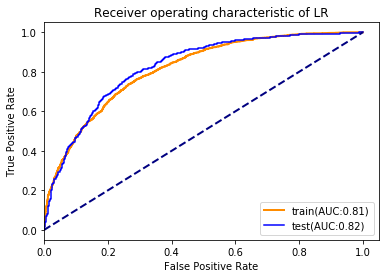

/Users/liuxiaoying/anaconda3/envs/my_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


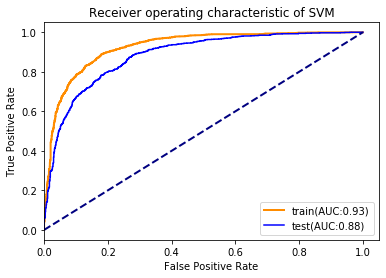

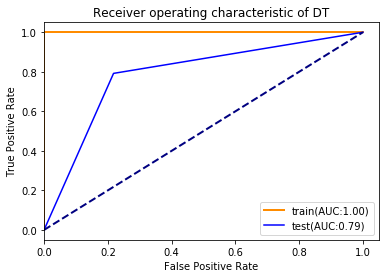

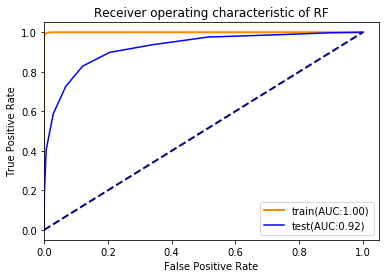

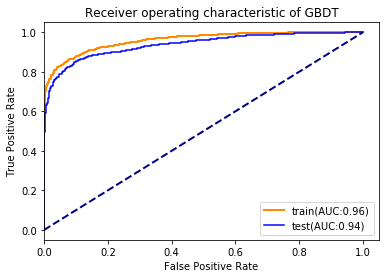

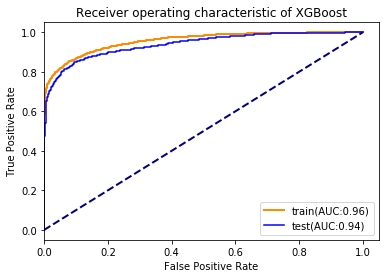

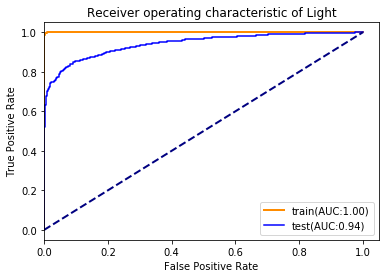

In [72]:
df_metric = pd.DataFrame(columns=['Model','dataset','Accuracy','Precision','Recall','F1','AUC'])
row = 0 
fprs_train = []
tprs_train = []
aucs_train = []
fprs_test = []
tprs_test = []
aucs_test = []

for name, clf in models.items():
    clf.fit(XTrain,YTrain)
    
    acc,p,r,f1,fpr_train,tpr_train,auc_train = get_metric(clf, XTrain, YTrain)
    fprs_train.append(fpr_train)
    tprs_train.append(tpr_train)
    aucs_train.append(auc_train)
    df_metric.loc[row] = [name,'train',acc,p,r,f1,auc_train]
    row += 1
    
    acc,p,r,f1,fpr_test,tpr_test,auc_test = get_metric(clf, XTest, YTest)
    fprs_test.append(fpr_test)
    tprs_test.append(tpr_test)
    aucs_test.append(auc_test)
    df_metric.loc[row] = [name,' ',acc,p,r,f1,auc_test]
    row += 1
    
    plt.figure()
    
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='train(AUC:%0.2f)'%auc_train)
    plt.plot(fpr_test, tpr_test, color='blue',label='test(AUC:%0.2f)'%auc_test)
    plt.plot([0,1],[0,1],color='navy',lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of '+name)
    plt.legend(loc="lower right")
    plt.show()
    

In [73]:
df_metric

,Model,dataset,Accuracy,Precision,Recall,F1,AUC
0,LR,train,0.732035,0.740879,0.715659,0.728051,0.813160
1,LR,,0.749064,0.752399,0.738230,0.745247,0.824312
2,SVM,train,0.851265,0.838473,0.871045,0.854449,0.926020
3,SVM,,0.795412,0.788550,0.804143,0.796270,0.883151
4,DT,train,1.000000,1.000000,1.000000,1.000000,1.000000
5,DT,,0.786985,0.782326,0.791902,0.787085,0.787012
6,RF,train,0.994380,0.998788,0.989988,0.994368,0.999900
7,RF,,0.853933,0.871287,0.828625,0.849421,0.922958
8,GBDT,train,0.890205,0.922810,0.852223,0.886113,0.959246
9,GBDT,,0.872659,0.903061,0.833333,0.866797,0.937221


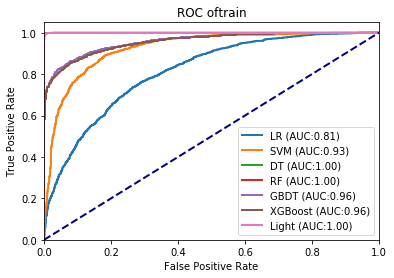

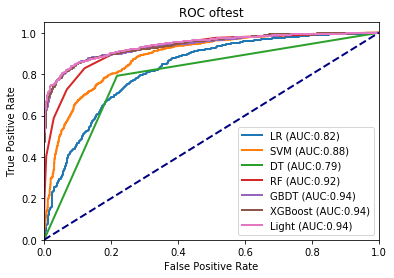

In [76]:
def plot_roc(fprs, tprs, aucs, title):
    plt.figure()

    colors = ['pink','aqua','orange','blue','']
    for i,name in enumerate(models):
        plt.plot(fprs[i],tprs[i],lw=2,label='{0} (AUC:{1:0.2f})'.format(name, aucs[i]))
    
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of 
              '+title)
    plt.legend(loc='lower right')
    plt.show()

# tprs_train
plot_roc(fprs_train, tprs_train, aucs_train, 'train')
plot_roc(fprs_test, tprs_test, aucs_test, 'test')